In [1]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')
df['sale_yr'] = pd.to_numeric(df.date.str.slice(0, 4))
df['sale_month'] = pd.to_numeric(df.date.str.slice(4, 6))
df['sale_day'] = pd.to_numeric(df.date.str.slice(6, 8))
kc_data = pd.DataFrame(df, columns=[
        'sale_yr','sale_month','sale_day',
        'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
        'condition','grade','sqft_above','sqft_basement','yr_built',
        'zipcode','lat','long','sqft_living15','sqft_lot15','price'])
label_col = 'price'
print(kc_data.describe())


kc_x_train, kc_x_valid, kc_y_train, kc_y_valid = train_test_split(kc_data.iloc[:,0:18], kc_data.iloc[:,18],
                                                    test_size=0.3, random_state=87)
np.random.seed(155)
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)
def z_score(col, stats):
    m, M, mu, s = stats
    df2 = pd.DataFrame()
    for c in col.columns:
        df2[c] = (col[c]-mu[c])/s[c]
    return df2
stats = norm_stats(kc_x_train, kc_x_valid)
arr_x_train = np.array(z_score(kc_x_train, stats))
arr_y_train = np.array(kc_y_train)
arr_x_valid = np.array(z_score(kc_x_valid, stats))
arr_y_valid = np.array(kc_y_valid)
print('Training shape:', arr_x_train.shape)
print('ddd',arr_y_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)
model = basic_model_1(arr_x_train.shape[1], 1)
model.summary()
epochs = 500
batch_size =128
history = model.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),)
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

E:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


            sale_yr    sale_month      sale_day      bedrooms     bathrooms  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean    2014.322954      6.574423     15.688197      3.370842      2.114757   
std        0.467616      3.115308      8.635063      0.930062      0.770163   
min     2014.000000      1.000000      1.000000      0.000000      0.000000   
25%     2014.000000      4.000000      8.000000      3.000000      1.750000   
50%     2014.000000      6.000000     16.000000      3.000000      2.250000   
75%     2015.000000      9.000000     23.000000      4.000000      2.500000   
max     2015.000000     12.000000     31.000000     33.000000      8.000000   

        sqft_living      sqft_lot        floors     condition         grade  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      3.409430      7.656873   
std      918.440897  4.142051e+04      0.539989    

Epoch 24/500
 - 0s - loss: 376850255622.6500 - mean_absolute_error: 495169.1681 - val_loss: 395123964597.6163 - val_mean_absolute_error: 503251.2930
Epoch 25/500
 - 0s - loss: 373902465625.7159 - mean_absolute_error: 492171.6775 - val_loss: 392086090508.7921 - val_mean_absolute_error: 500221.8267
Epoch 26/500
 - 0s - loss: 370901155814.0091 - mean_absolute_error: 489114.3684 - val_loss: 389005502978.2110 - val_mean_absolute_error: 497131.7205
Epoch 27/500
 - 0s - loss: 367856436292.6998 - mean_absolute_error: 485989.2713 - val_loss: 385876077725.2955 - val_mean_absolute_error: 493972.5243
Epoch 28/500
 - 0s - loss: 364766097614.0319 - mean_absolute_error: 482795.3876 - val_loss: 382699495146.0481 - val_mean_absolute_error: 490745.1254
Epoch 29/500
 - 0s - loss: 361636830700.8114 - mean_absolute_error: 479547.3014 - val_loss: 379492644092.0518 - val_mean_absolute_error: 487465.3518
Epoch 30/500
 - 0s - loss: 358463281246.8937 - mean_absolute_error: 476228.7262 - val_loss: 376234519628.4

Epoch 79/500
 - 0s - loss: 192754862892.0796 - mean_absolute_error: 265638.1924 - val_loss: 206275916678.0802 - val_mean_absolute_error: 272977.7057
Epoch 80/500
 - 0s - loss: 189837842975.7779 - mean_absolute_error: 261510.6720 - val_loss: 203269256863.5065 - val_mean_absolute_error: 268791.9115
Epoch 81/500
 - 0s - loss: 186977702783.3316 - mean_absolute_error: 257420.4465 - val_loss: 200320794452.1752 - val_mean_absolute_error: 264702.0271
Epoch 82/500
 - 0s - loss: 184146206128.1660 - mean_absolute_error: 253402.5809 - val_loss: 197396238757.9815 - val_mean_absolute_error: 260665.1433
Epoch 83/500
 - 0s - loss: 181364858280.5854 - mean_absolute_error: 249512.8898 - val_loss: 194530813596.9796 - val_mean_absolute_error: 256683.3492
Epoch 84/500
 - 0s - loss: 178620010240.9645 - mean_absolute_error: 245595.0897 - val_loss: 191694112180.5108 - val_mean_absolute_error: 252801.8025
Epoch 85/500
 - 0s - loss: 175923074127.8001 - mean_absolute_error: 241756.0983 - val_loss: 188912685614.4

Epoch 134/500
 - 0s - loss: 89242493242.0565 - mean_absolute_error: 132746.4040 - val_loss: 98239077956.5404 - val_mean_absolute_error: 139645.4054
Epoch 135/500
 - 0s - loss: 88118745462.2957 - mean_absolute_error: 131404.7512 - val_loss: 97039719399.3634 - val_mean_absolute_error: 138329.0101
Epoch 136/500
 - 0s - loss: 86995192843.1680 - mean_absolute_error: 130011.5160 - val_loss: 95841143677.2363 - val_mean_absolute_error: 136977.0088
Epoch 137/500
 - 0s - loss: 85872137125.5057 - mean_absolute_error: 128567.4970 - val_loss: 94645234227.4843 - val_mean_absolute_error: 135634.1792
Epoch 138/500
 - 0s - loss: 84776780655.6288 - mean_absolute_error: 127193.1039 - val_loss: 93480055093.5373 - val_mean_absolute_error: 134310.0180
Epoch 139/500
 - 0s - loss: 83701337390.4824 - mean_absolute_error: 125811.1031 - val_loss: 92349466869.1030 - val_mean_absolute_error: 133033.3816
Epoch 140/500
 - 0s - loss: 82641979880.2766 - mean_absolute_error: 124508.3959 - val_loss: 91224041295.1215 - v

Epoch 190/500
 - 0s - loss: 49049511449.7540 - mean_absolute_error: 91870.4160 - val_loss: 54382496767.3683 - val_mean_absolute_error: 100136.7700
Epoch 191/500
 - 0s - loss: 48641469560.1401 - mean_absolute_error: 91492.3712 - val_loss: 53916983189.2412 - val_mean_absolute_error: 99948.9121
Epoch 192/500
 - 0s - loss: 48241780983.3195 - mean_absolute_error: 91355.6128 - val_loss: 53482461854.2431 - val_mean_absolute_error: 99650.7517
Epoch 193/500
 - 0s - loss: 47852536344.0619 - mean_absolute_error: 90947.8950 - val_loss: 53023886675.8593 - val_mean_absolute_error: 99389.9271
Epoch 194/500
 - 0s - loss: 47470498984.0608 - mean_absolute_error: 90883.4258 - val_loss: 52593602342.0605 - val_mean_absolute_error: 99165.1900
Epoch 195/500
 - 0s - loss: 47078678517.3058 - mean_absolute_error: 90538.9499 - val_loss: 52143274018.1123 - val_mean_absolute_error: 98861.5980
Epoch 196/500
 - 0s - loss: 46721618627.9807 - mean_absolute_error: 90309.0570 - val_loss: 51743433895.4028 - val_mean_abso

Epoch 247/500
 - 0s - loss: 34330092733.1107 - mean_absolute_error: 81347.2606 - val_loss: 37464930725.9815 - val_mean_absolute_error: 89306.4929
Epoch 248/500
 - 0s - loss: 34168222191.8572 - mean_absolute_error: 81218.3437 - val_loss: 37291860996.4220 - val_mean_absolute_error: 89140.6811
Epoch 249/500
 - 0s - loss: 34018446570.2563 - mean_absolute_error: 80970.2242 - val_loss: 37116406526.8945 - val_mean_absolute_error: 89173.8023
Epoch 250/500
 - 0s - loss: 33855881552.7985 - mean_absolute_error: 80985.1013 - val_loss: 36937957188.3825 - val_mean_absolute_error: 88907.4506
Epoch 251/500
 - 0s - loss: 33711011820.4392 - mean_absolute_error: 80767.9195 - val_loss: 36765515637.6558 - val_mean_absolute_error: 88954.5835
Epoch 252/500
 - 0s - loss: 33565088344.0915 - mean_absolute_error: 80767.0605 - val_loss: 36614222781.0389 - val_mean_absolute_error: 88765.9765
Epoch 253/500
 - 0s - loss: 33418243077.9901 - mean_absolute_error: 80640.2836 - val_loss: 36446208953.8803 - val_mean_absol

Epoch 304/500
 - 0s - loss: 28020961015.5394 - mean_absolute_error: 76827.2611 - val_loss: 30581652017.9050 - val_mean_absolute_error: 85457.7858
Epoch 305/500
 - 0s - loss: 27949941987.8940 - mean_absolute_error: 76819.8216 - val_loss: 30496504894.5392 - val_mean_absolute_error: 85533.7570
Epoch 306/500
 - 0s - loss: 27866009645.3825 - mean_absolute_error: 76921.6945 - val_loss: 30453510892.8908 - val_mean_absolute_error: 85325.5625
Epoch 307/500
 - 0s - loss: 27790559569.0692 - mean_absolute_error: 76680.3656 - val_loss: 30360738876.3282 - val_mean_absolute_error: 85291.3132
Epoch 308/500
 - 0s - loss: 27714231007.4606 - mean_absolute_error: 76693.7758 - val_loss: 30284453477.3893 - val_mean_absolute_error: 85203.6718
Epoch 309/500
 - 0s - loss: 27662984703.8985 - mean_absolute_error: 76480.1778 - val_loss: 30207667082.5022 - val_mean_absolute_error: 85308.2518
Epoch 310/500
 - 0s - loss: 27569343959.4231 - mean_absolute_error: 76430.4022 - val_loss: 30126620719.3782 - val_mean_absol

Epoch 361/500
 - 0s - loss: 24678725271.3427 - mean_absolute_error: 74716.8844 - val_loss: 27350144338.5959 - val_mean_absolute_error: 83838.3875
Epoch 362/500
 - 0s - loss: 24640436521.4568 - mean_absolute_error: 74681.0741 - val_loss: 27320484023.1956 - val_mean_absolute_error: 83973.1571
Epoch 363/500
 - 0s - loss: 24596281822.9361 - mean_absolute_error: 74663.9588 - val_loss: 27298791219.6422 - val_mean_absolute_error: 83879.5417
Epoch 364/500
 - 0s - loss: 24551614851.2912 - mean_absolute_error: 74684.3964 - val_loss: 27245672755.3263 - val_mean_absolute_error: 83926.6788
Epoch 365/500
 - 0s - loss: 24495853773.6934 - mean_absolute_error: 74601.8335 - val_loss: 27204952756.0370 - val_mean_absolute_error: 83957.6747
Epoch 366/500
 - 0s - loss: 24456575809.7386 - mean_absolute_error: 74568.3277 - val_loss: 27177998145.8556 - val_mean_absolute_error: 84009.4876
Epoch 367/500
 - 0s - loss: 24404339054.0551 - mean_absolute_error: 74650.0862 - val_loss: 27161585379.7310 - val_mean_absol

Epoch 418/500
 - 0s - loss: 22617402980.2070 - mean_absolute_error: 73469.5812 - val_loss: 25779990695.4028 - val_mean_absolute_error: 83549.4710
Epoch 419/500
 - 0s - loss: 22590683260.9457 - mean_absolute_error: 73365.6830 - val_loss: 25765149499.2227 - val_mean_absolute_error: 83456.3358
Epoch 420/500
 - 0s - loss: 22569919161.2865 - mean_absolute_error: 73389.1687 - val_loss: 25716848818.7736 - val_mean_absolute_error: 83446.7720
Epoch 421/500
 - 0s - loss: 22520768506.5852 - mean_absolute_error: 73322.4289 - val_loss: 25682501119.3683 - val_mean_absolute_error: 83518.4189
Epoch 422/500
 - 0s - loss: 22505807479.9709 - mean_absolute_error: 73256.4773 - val_loss: 25649428367.2400 - val_mean_absolute_error: 83580.1531
Epoch 423/500
 - 0s - loss: 22469764063.1053 - mean_absolute_error: 73406.8872 - val_loss: 25640201688.5182 - val_mean_absolute_error: 83532.2150
Epoch 424/500
 - 0s - loss: 22437228225.8148 - mean_absolute_error: 73223.7627 - val_loss: 25613295537.9840 - val_mean_absol

Epoch 475/500
 - 0s - loss: 20987282492.3746 - mean_absolute_error: 72133.3495 - val_loss: 24802512880.2073 - val_mean_absolute_error: 83533.9423
Epoch 476/500
 - 0s - loss: 20972449993.5985 - mean_absolute_error: 72185.5999 - val_loss: 24782301027.9679 - val_mean_absolute_error: 83494.8748
Epoch 477/500
 - 0s - loss: 20939804229.3767 - mean_absolute_error: 72139.4033 - val_loss: 24784836208.1283 - val_mean_absolute_error: 83391.2134
Epoch 478/500
 - 0s - loss: 20920087861.7923 - mean_absolute_error: 71975.5667 - val_loss: 24743452607.5657 - val_mean_absolute_error: 83604.3107
Epoch 479/500
 - 0s - loss: 20882799209.9602 - mean_absolute_error: 71953.2983 - val_loss: 24682290447.3189 - val_mean_absolute_error: 83838.0574
Epoch 480/500
 - 0s - loss: 20876512222.2931 - mean_absolute_error: 72086.9944 - val_loss: 24705160114.6157 - val_mean_absolute_error: 83583.1154
Epoch 481/500
 - 0s - loss: 20849076191.6468 - mean_absolute_error: 72023.2859 - val_loss: 24685042971.3214 - val_mean_absol

11493376/11490434 [==============================] - 1s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.2750 - acc: 0.9156 - val_loss: 0.1122 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0937 - acc: 0.9711 - val_loss: 0.1182 - val_acc: 0.96331s - loss: 
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0586 - acc: 0.9821 - val_loss: 0.0883 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0402 - acc: 0.9872 - val_loss: 0.0733 - val_acc: 0.9783
Epoch 5/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0286 - acc: 0.9912 - val_loss: 0.0697 - val_acc: 0.9813
Epoch 6/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0222 - acc: 0.9925 - val_loss: 0.0920 - val_acc: 0.9748
Epoch 7/20
60000/60000 [================

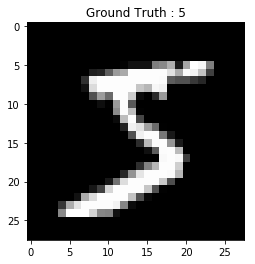

In [2]:
 from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


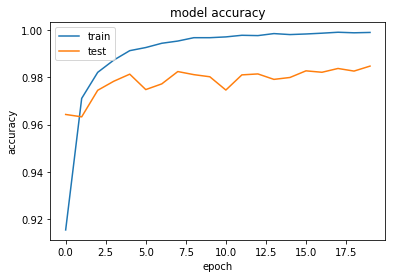

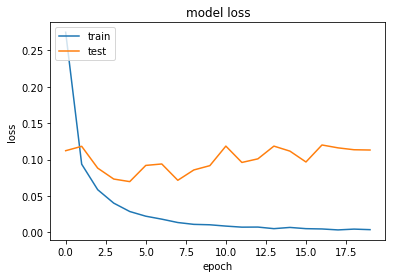

In [3]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

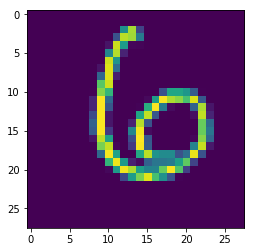

In [38]:
n=100
plt.imshow(test_images[n,:,:])
single_test=test_images[n]
single_test=single_test.reshape(1,dimData)


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


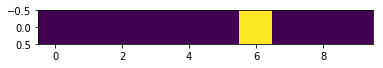

In [40]:
predicted=model.predict(single_test)
print(predicted)
plt.imshow(predicted)

In [45]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(784,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=10, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(test_data, test_labels_one_hot, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


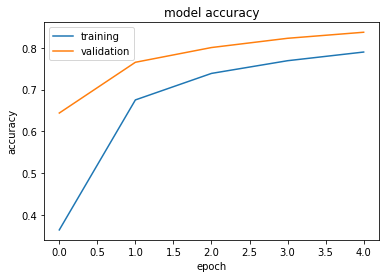


Test loss: 1.02
Test accuracy: 0.811
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


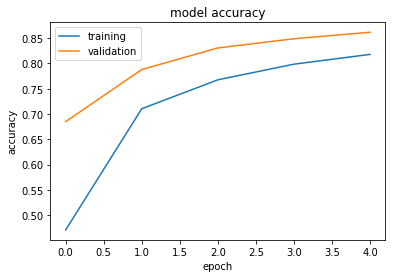


Test loss: 0.863
Test accuracy: 0.838
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


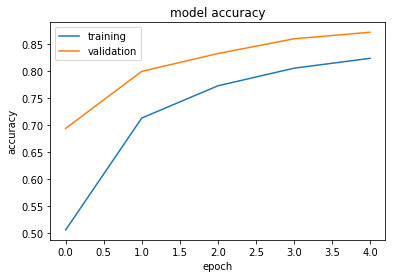


Test loss: 0.796
Test accuracy: 0.842
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


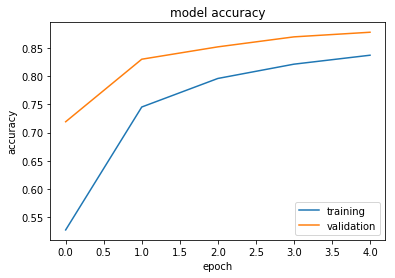


Test loss: 0.732
Test accuracy: 0.855
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


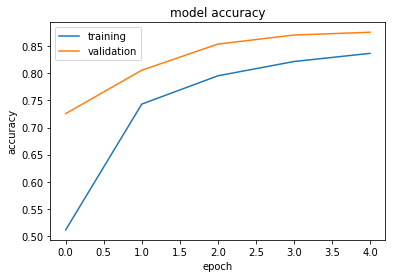


Test loss: 0.692
Test accuracy: 0.854
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


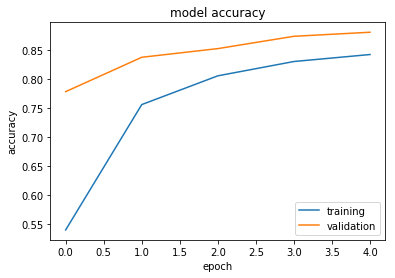


Test loss: 0.656
Test accuracy: 0.856
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


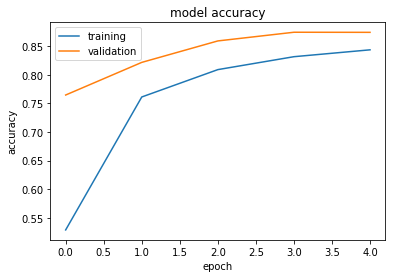


Test loss: 0.642
Test accuracy: 0.849


In [46]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)